# ***Flight Price Prediction***

### ***`Import Important Libraries`***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ***`Importing Dataset`***
1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of 
3. Check whether any null values are there or nto. if it is present then following can be done,

  a. Imputing data usint imputation method in sklearn

  b. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> whihc can be give statistical analysis

In [2]:
train_data = pd.read_excel(r'Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Information of dataset 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# counts total number appearnce for every uniques value in 'Duration' feature
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
41h 20m      1
31h 30m      1
33h 20m      1
31h 50m      1
42h 5m       1
Name: Duration, Length: 368, dtype: int64

### ***`Handling NaN Values`***
Drop Nan Values because from info() we can see that there is only 1 or 2 nan values out of 10683 entries so, removing rows with nan value whouldn't effect on our Model

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# ***`EDA`***


From description we can see that Date_of_journy is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [9]:
#Handling "Data_of_Journey" 
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [10]:
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format  = "%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
#Handling "Dep_Time"
#Extractng Hours
train_data["dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
#Extracting Minutes
train_data["dep_minute"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
#Drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"],axis=1,inplace = True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
#Handling "Arrival_time"
#Extracting Hours
train_data["arr_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
#Extracting Minute
train_data["arr_minute"]  = pd.to_datetime(train_data["Arrival_Time"]).dt.minute
#Drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"],axis = 1, inplace = True )

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
a='2h 50m'.split()
a

['2h', '50m']

In [18]:
'2h '.strip()

'2h'

In [19]:
len(a)

2

In [20]:
a='2h 50m'
a.split(sep='m')[0].split()[-1]

'50'

In [21]:
# Time taken by plane to reach destination is called Duration
# It is the difference between Departure Time and Arrival Time

#Assigning and converting Duration column into list
duration = list(train_data["Duration"])


for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + ' 0m' # Adds  0 minute
    else: 
      duration[i] = '0h ' + duration[i] # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = 'h')[0])) # Extract hours in duration_hours list
  duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # Extract mins in duration_mins list

In [22]:
#add duration_hours,duration_mins list in dataset in column name duration_hours and duration_mins respectively 
train_data['duration_hours'] = duration_hours
train_data["duration_mins"] = duration_mins

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [24]:
# now we don't have any use of "Duration" feature , so we can remove it
train_data.drop(["Duration"], axis = 1 , inplace = True )

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### ***`Handling Categorical data`***
One can find many ways to handle categorical data. Some of them categorical data are - 
 - Nominal Data --> data are not in any order --> OneHotEncoder is used in this case
 - Ordinal Data --> data are in order --> LabelEncoder is used in this case

In [26]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

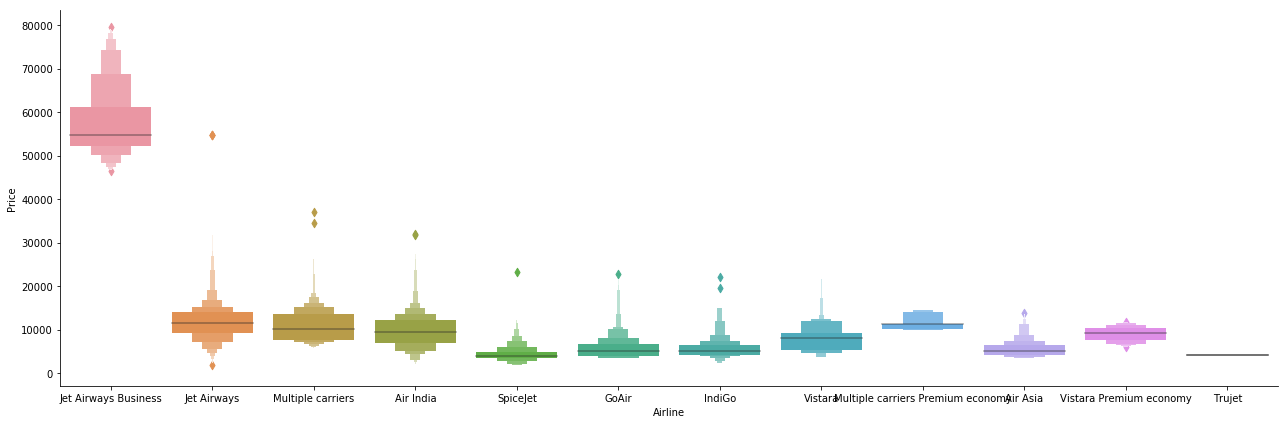

In [27]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data  =train_data.sort_values("Price",ascending  = False ), kind = "boxen", height = 6 , aspect  = 3 )

Observation  :-  from graph we can see that Jet Airways Business only has the highest price , remaing all the airline prices median is approx same.

In [28]:
# An Airline is Nominal Categorical data we will perform OneHotEncoding
Airline  = train_data[["Airline"]]
Airline

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10678,Air Asia
10679,Air India
10680,Jet Airways
10681,Vistara


In [29]:
Airline  = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

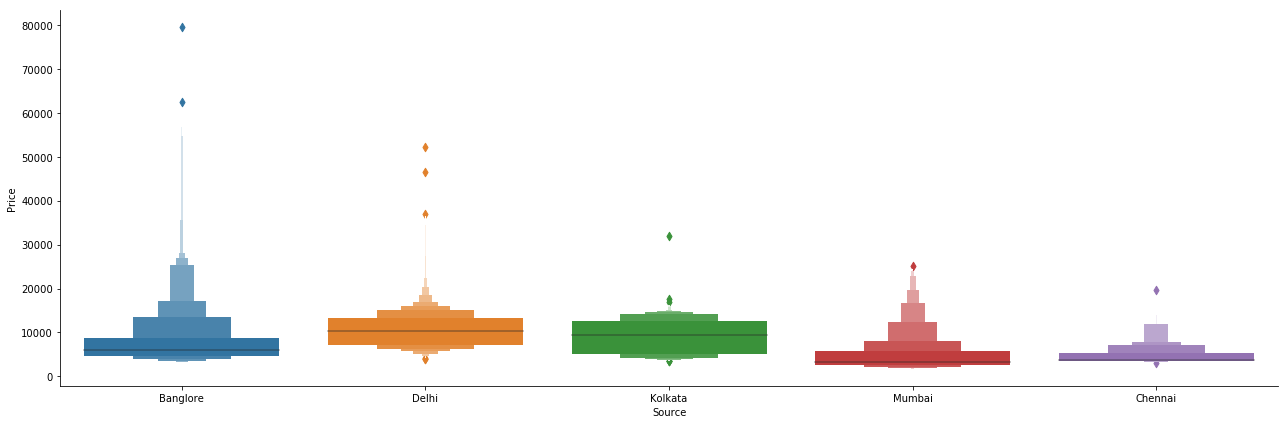

In [31]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data  =train_data.sort_values("Price",ascending  = False ), kind = "boxen", height = 6 , aspect  = 3 )

In [32]:
# An Source is Nominal Categorical data we will perform OneHotEncoding
Source  = train_data[["Source"]]
Source

,Source
0,Banglore
1,Kolkata
2,Delhi
3,Kolkata
4,Banglore
...,...
10678,Kolkata
10679,Kolkata
10680,Banglore
10681,Banglore


In [33]:
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

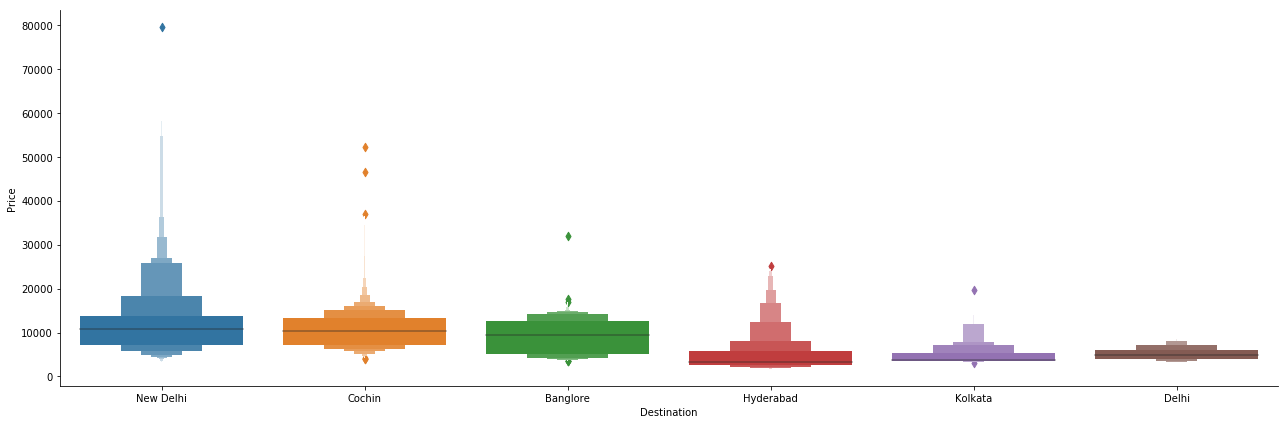

In [35]:
# Destination vs Price
sns.catplot(y = "Price", x = "Destination", data  =train_data.sort_values("Price",ascending  = False ), kind = "boxen", height = 6 , aspect  = 3 )

In [36]:
# An Destination is Nominal Categorical data we will perform OneHotEncoding
Destination  = train_data[["Destination"]]
Destination

,Destination
0,New Delhi
1,Banglore
2,Cochin
3,Banglore
4,New Delhi
...,...
10678,Banglore
10679,Banglore
10680,Delhi
10681,New Delhi


In [37]:
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
train_data["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → JDH → JAI → DEL → HYD             1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → JLR → HYD                         1
CCU → IXZ → MAA → BLR                   1
CCU → IXA → BLR                         1
Name: Route, Length: 128, dtype: int64

In [39]:
train_data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [40]:
(train_data["Additional_Info"].value_counts()/len(train_data["Additional_Info"])) * 100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
2 Long layover                   0.009362
Red-eye flight                   0.009362
Name: Additional_Info, dtype: float64

In [41]:
#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other 
train_data.drop(['Additional_Info','Route'],axis = 1, inplace = True)

In [42]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
# Total_stops is Ordinal Categorical type so we perform label encoding
from sklearn.preprocessing import LabelEncoder
L  = LabelEncoder()
train_data["Total_Stop_n"] = L.fit_transform(train_data['Total_Stops'])
train_data.drop(["Total_Stops"],axis = 1,inplace=True)
train_data

,Airline,Source,Destination,Price,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,Total_Stop_n
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,2,50,4
1,Air India,Kolkata,Banglore,7662,1,5,5,50,13,15,7,25,1
2,Jet Airways,Delhi,Cochin,13882,9,6,9,25,4,25,19,0,1
3,IndiGo,Kolkata,Banglore,6218,12,5,18,5,23,30,5,25,0
4,IndiGo,Banglore,New Delhi,13302,1,3,16,50,21,35,4,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,4107,9,4,19,55,22,25,2,30,4
10679,Air India,Kolkata,Banglore,4145,27,4,20,45,23,20,2,35,4
10680,Jet Airways,Banglore,Delhi,7229,27,4,8,20,11,20,3,0,4
10681,Vistara,Banglore,New Delhi,12648,1,3,11,30,14,10,2,40,4


In [44]:
# Concatinate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([train_data,Airline,Source,Destination],axis = 1)

In [45]:
data_train.head()

,Airline,Source,Destination,Price,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,Total_Stop_n,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,2,50,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7662,1,5,5,50,13,15,7,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,13882,9,6,9,25,4,25,19,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
data_train.drop(["Airline","Source","Destination"],axis = 1,inplace=True)

In [47]:
data_train.head()

,Price,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,Total_Stop_n,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,22,20,1,10,2,50,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


----

### ***`Importing Dataset`***
1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of 
3. Check whether any null values are there or nto. if it is present then following can be done,

  a. Imputing data usint imputation method in sklearn

  b. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> whihc can be give statistical analysis

In [49]:
test_data = pd.read_excel(r'Test_set.xlsx')

In [50]:
pd.set_option('display.max_columns',None)

In [51]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [52]:
# Information of dataset 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [53]:
# counts total number appearnce for every uniques value in 'Duration' feature
test_data["Duration"].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
29h 40m      1
22h 50m      1
31h 10m      1
17h 40m      1
13h 5m       1
Name: Duration, Length: 320, dtype: int64

### ***`Handling NaN Values`***
Drop Nan Values because from info() we can see that there is only 1 or 2 nan values out of 10683 entries so, removing rows with nan value whouldn't effect on our Model

In [54]:
test_data.dropna(inplace = True)

In [55]:

test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# ***`EDA`***


From description we can see that Date_of_journy is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [56]:
#Handling "Data_of_Journey" 
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [57]:
test_data["Journey_month"] = pd.to_datetime(test_data.Date_of_Journey, format  = "%d/%m/%Y").dt.month

In [58]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [59]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [60]:
#Handling "Dep_Time"
#Extractng Hours
test_data["dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
#Extracting Minutes
test_data["dep_minute"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
#Drop Dep_Time as it is of no use
test_data.drop(["Dep_Time"],axis=1,inplace = True)

In [61]:
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [62]:
#Handling "Arrival_time"
#Extracting Hours
test_data["arr_hour"] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour
#Extracting Minute
test_data["arr_minute"]  = pd.to_datetime(test_data["Arrival_Time"]).dt.minute
#Drop Arrival_Time as it is of no use
test_data.drop(["Arrival_Time"],axis = 1, inplace = True )

In [63]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [64]:
# Time taken by plane to reach destination is called Duration
# It is the difference between Departure Time and Arrival Time

#Assigning and converting Duration column into list
duration = list(test_data["Duration"])


for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + ' 0m' # Adds  0 minute
    else: 
      duration[i] = '0h ' + duration[i] # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = 'h')[0])) # Extract hours in duration_hours list
  duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # Extract mins in duration_mins list

In [65]:
#add duration_hours,duration_mins list in dataset in column name duration_hours and duration_mins respectively 
test_data['duration_hours'] = duration_hours
test_data["duration_mins"] = duration_mins

In [66]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


In [67]:
# now we don't have any use of "Duration" feature , so we can remove it
test_data.drop(["Duration"], axis = 1 , inplace = True )

In [68]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


### ***`Handling Categorical data`***
One can find many ways to handle categorical data. Some of them categorical data are - 
 - Nominal Data --> data are not in any order --> OneHotEncoder is used in this case
 - Ordinal Data --> data are in order --> LabelEncoder is used in this case

In [69]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [70]:
# An Airline is Nominal Categorical data we will perform OneHotEncoding
Airline  = test_data[["Airline"]]
Airline

,Airline
0,Jet Airways
1,IndiGo
2,Jet Airways
3,Multiple carriers
4,Air Asia
...,...
2666,Air India
2667,IndiGo
2668,Jet Airways
2669,Air India


In [71]:
Airline  = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [72]:
test_data["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [73]:
# An Source is Nominal Categorical data we will perform OneHotEncoding
Source  = test_data[["Source"]]
Source

,Source
0,Delhi
1,Kolkata
2,Delhi
3,Delhi
4,Banglore
...,...
2666,Kolkata
2667,Kolkata
2668,Delhi
2669,Delhi


In [74]:
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [75]:
test_data["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [76]:
# An Destination is Nominal Categorical data we will perform OneHotEncoding
Destination  = test_data[["Destination"]]
Destination

,Destination
0,Cochin
1,Banglore
2,Cochin
3,Cochin
4,Delhi
...,...
2666,Banglore
2667,Banglore
2668,Cochin
2669,Cochin


In [77]:
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [78]:
test_data["Route"].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BDQ → DEL                  1
BOM → VGA → TIR → HYD            1
BLR → VGA → VTZ → DEL            1
CCU → BBI → IXR → DEL → BLR      1
CCU → BOM → TRV → BLR            1
Name: Route, Length: 100, dtype: int64

In [79]:
test_data["Additional_Info"].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [80]:
(test_data["Additional_Info"].value_counts()/len(test_data["Additional_Info"])) * 100

No info                         80.419319
In-flight meal not included     16.622988
No check-in baggage included     2.845376
Business class                   0.037439
Change airports                  0.037439
1 Long layover                   0.037439
Name: Additional_Info, dtype: float64

In [81]:
#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other 
test_data.drop(['Additional_Info','Route'],axis = 1, inplace = True)

In [82]:
test_data["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [83]:
# Total_stops is Ordinal Categorical type so we perform label encoding
from sklearn.preprocessing import LabelEncoder
L  = LabelEncoder()
test_data["Total_Stop_n"] = L.fit_transform(test_data['Total_Stops'])
test_data.drop(["Total_Stops"],axis = 1,inplace=True)
test_data

,Airline,Source,Destination,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,Total_Stop_n
0,Jet Airways,Delhi,Cochin,6,6,17,30,4,25,10,55,0
1,IndiGo,Kolkata,Banglore,12,5,6,20,10,20,4,0,0
2,Jet Airways,Delhi,Cochin,21,5,19,15,19,0,23,45,0
3,Multiple carriers,Delhi,Cochin,21,5,8,0,21,0,13,0,0
4,Air Asia,Banglore,Delhi,24,6,23,55,2,45,2,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,6,6,20,30,20,25,23,55,0
2667,IndiGo,Kolkata,Banglore,27,3,14,20,16,55,2,35,4
2668,Jet Airways,Delhi,Cochin,6,3,21,50,4,25,6,35,0
2669,Air India,Delhi,Cochin,6,3,4,0,19,15,15,15,0


In [84]:
# Concatinate dataframe -->test_data + Airline + Source + Destination
data_test = pd.concat([test_data,Airline,Source,Destination],axis = 1)

In [85]:
data_test.head()

,Airline,Source,Destination,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,Total_Stop_n,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,24,6,23,55,2,45,2,50,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [86]:
data_test.drop(["Airline","Source","Destination"],axis = 1,inplace=True)

In [87]:
data_test.head()

,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,Total_Stop_n,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24,6,23,55,2,45,2,50,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


----

## ***`Feature Selection`***

Finding Out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods.
1. heatmap
2. featuer_importance_
3. SelectKBest

In [89]:
data_train.shape

(10682, 30)

In [90]:
data_train.columns

Index(['Price', 'Journey_day', 'Journey_month', 'dep_hour', 'dep_minute',
       'arr_hour', 'arr_minute', 'duration_hours', 'duration_mins',
       'Total_Stop_n', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [91]:
X = data_train.drop(["Price"],axis = 1)

In [92]:
X

,Journey_day,Journey_month,dep_hour,dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,Total_Stop_n,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,3,22,20,1,10,2,50,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,5,5,50,13,15,7,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9,6,9,25,4,25,19,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,19,55,22,25,2,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,27,4,20,45,23,20,2,35,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,27,4,8,20,11,20,3,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,1,3,11,30,14,10,2,40,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [93]:
y = data_train.Price

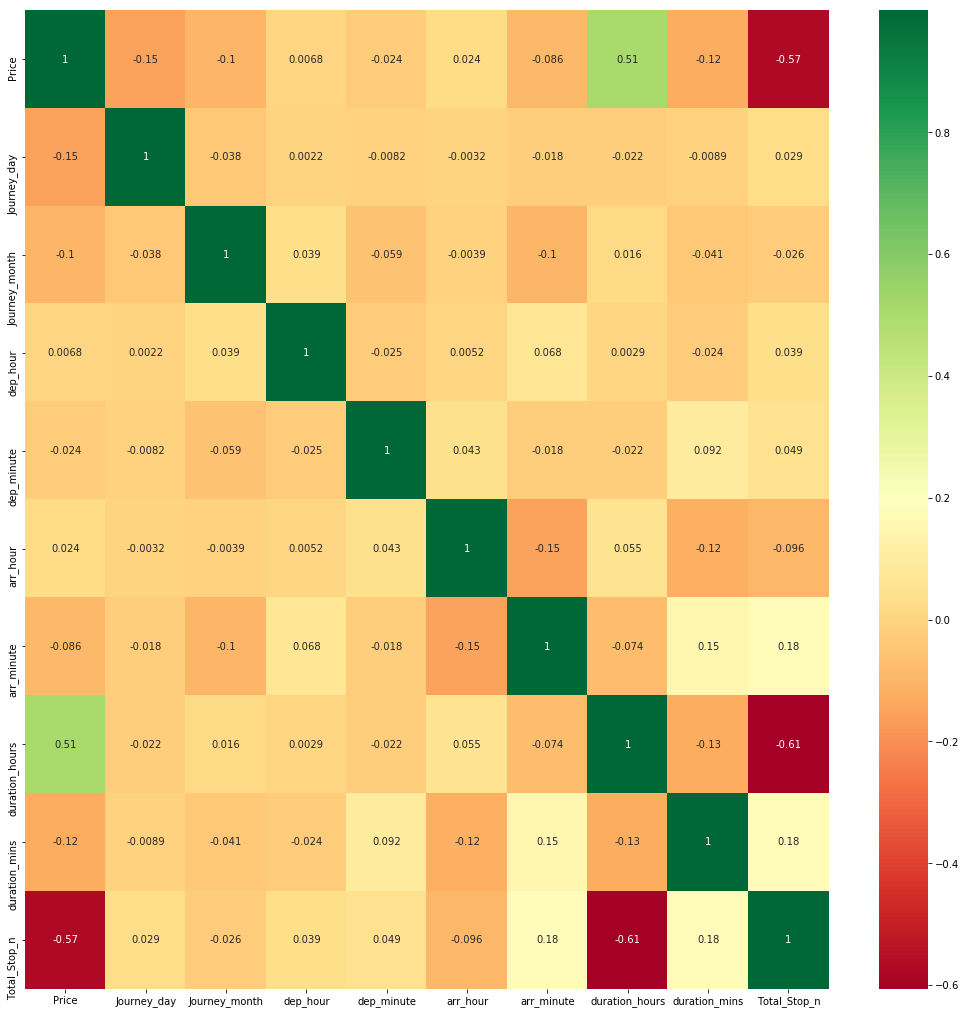

In [94]:
#Find correlation between Independent Feature and dependent Feature
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr() , annot = True,cmap="RdYlGn")

In [95]:
#Important Feature using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [96]:
selection.feature_importances_

array([1.44015380e-01, 5.29944729e-02, 2.40668521e-02, 2.13233272e-02,
       2.95621514e-02, 1.92655569e-02, 4.82457542e-02, 1.65865841e-02,
       3.71361860e-01, 7.26043272e-03, 1.64206911e-03, 2.29540936e-02,
       9.74331461e-02, 6.53965792e-02, 1.70397819e-02, 8.76080429e-04,
       2.75613676e-03, 1.22324050e-04, 4.87288967e-03, 8.17953048e-05,
       4.92521446e-04, 5.08886316e-03, 3.53728466e-03, 5.52171147e-03,
       3.50632207e-03, 3.84107163e-03, 4.99539962e-03, 4.57434841e-04,
       2.47021235e-02])

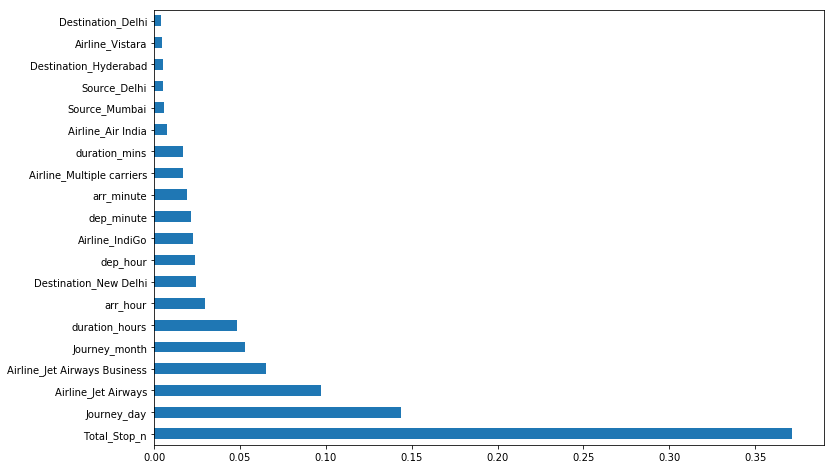

In [97]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

## ***`Fitting model using Random Forest`***
1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    - scaling is not reqd for Random Fores
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot Graph

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 1)

In [99]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
y_pred = reg_rf.predict(X_test)

In [101]:
reg_rf.score(X_train, y_train)

0.9543485447097463

In [102]:
reg_rf.score(X_test, y_test)

0.8077019751485209

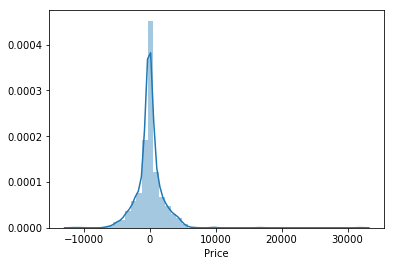

In [103]:
sns.distplot(y_test-y_pred)

In [104]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 1220.205822598059
MSE: 3944165.254024626
RMSE: 1985.9922593063213


In [105]:
metrics.r2_score(y_test,y_pred)

0.8077019751485208

## ***`Hyperparameter Tuning`***
- Choose following method for hyperparameter tuning
  - RandomizedSearchCV --> fast
  - GridSearchCV
- Assign hyperparameters in form dictionary
- Fit the model
- Check best parameters and best score

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [108]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions  = random_grid,scoring  = "neg_mean_squared_error", n_iter = 50, cv = 5, verbose=2,random_state = 12,n_jobs=1)

In [109]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30, total=  10.4s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30, total=  10.2s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30, total=  10.3s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30, total=  10.3s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=30, total=  10.3s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=100, total=  19.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=100 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=100, total=  19.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=100 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=100, total=  19.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=100 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=100, total=  20.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=100 
[CV]  n_esti

[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=40, total=   8.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70, total=   8.4s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70, total=   8.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70, total=   8.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70 
[CV]  n_estimators=2000, mi

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=90, total=   3.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=90 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=90, total=   3.2s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=40 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=40, total=   8.5s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=40 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=40, total=   8.4s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, bootstrap=False, max_features=sqrt, max_depth=40 
[CV]  n_estimators=1600

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=auto, max_depth=None, total=   6.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=auto, max_depth=None 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=auto, max_depth=None, total=   6.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=auto, max_depth=None 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=auto, max_depth=None, total=   6.7s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=auto, max_depth=20 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=auto, max_depth=20, total=  18.4s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=auto, max_depth=20 
[CV]  n_estimators=1

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=60, total=  23.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=60 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=60, total=  24.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=60 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=60, total=  25.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=60 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=60, total=  24.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, bootstrap=True, max_features=auto, max_depth=40 
[CV]  n_estimators=400

[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=50, total=   7.9s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=50, total=   7.9s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=50, total=   7.9s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=50, total=   7.9s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=50 
[CV]  n_esti

[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20, total=  35.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70, total=   3.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70, total=   3.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70, total=   3.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, bootstrap=True, max_features=sqrt, max_depth=70 
[CV]  n_estimators=800, mi

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=auto, max_depth=20, total=  20.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=auto, max_depth=20, total=  20.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=None 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=None, total=  33.2s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=None 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=None, total=  31.4s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=None 
[CV]  n_

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=80, total=   8.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=80 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=80, total=   8.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=80 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, max_features=sqrt, max_depth=80, total=   8.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, bootstrap=True, max_features=auto, max_depth=70 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, bootstrap=True, max_features=auto, max_depth=70, total=  17.8s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, bootstrap=True, max_features=auto, max_depth=70 
[CV]  n_estimators=1400

[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=100, total=   7.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=100 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=100, total=   6.8s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=100 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=100, total=   6.9s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=100 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=100, total=   6.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, bootstrap=False, max_features=auto, max_depth=20 
[CV]  n_estim

[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20, total=  35.2s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20, total=  35.9s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20, total=  34.8s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20, total=  35.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=20 
[CV]  n_estimators=1

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, bootstrap=False, max_features=auto, max_depth=80, total=  11.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=50, total=   7.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=50, total=   7.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=50, total=   7.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1200, mi

[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=110, total=   6.9s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=110 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, bootstrap=True, max_features=sqrt, max_depth=110, total=   6.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=70 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=70, total=  13.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=70 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=70, total=  12.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, bootstrap=False, max_features=auto, max_depth=70 
[CV]  n_estimators=600, m

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=auto, max_depth=60, total=  36.7s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=auto, max_depth=60 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=auto, max_depth=60, total=  40.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=auto, max_depth=60 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, bootstrap=False, max_features=auto, max_depth=60, total=  37.6s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=80 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=80, total=  32.9s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, bootstrap=False, max_features=auto, max_depth=80 
[CV]  n_estimator

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 109.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [110]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 600}

In [111]:
rf_random.score(X_test, y_test)

-3633099.7927900245

In [112]:
y_pred = rf_random.predict(X_test)

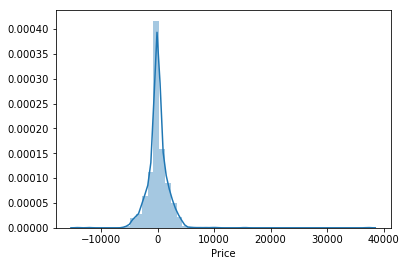

In [113]:
sns.distplot(y_test-y_pred)

In [114]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



MAE: 1163.6755951023204
MSE: 3633099.7927900245
RMSE: 1906.0691993707953


In [115]:
metrics.r2_score(y_test,y_pred)

0.8228679912615351

### ***`Save The Model`***

In [116]:
import pickle
file  = open('flight_model.pkl','wb')
pickle.dump(rf_random,file)


In [117]:
model = open('flight_model.pkl','rb')
forest = pickle.load(model)

In [118]:
y_predicition = forest.predict(X_test)

In [119]:
metrics.r2_score(y_test,y_predicition)

0.8228679912615351